In [41]:
import numpy as np
from operator import itemgetter

layers = [
    { "g": 0.9, "mu_a":0.04, "mu_s": 20, "h": 10 },
    { "g": 0.9, "mu_a":0.001, "mu_s": 0.1, "h": 10 },
    { "g": 0.9, "mu_a":0.025, "mu_s": 25, "h": 10 },
    { "g": 0.9, "mu_a":0.005, "mu_s": 60 }
]

# diffusion, rho > 1/mu_s'
def one_layer_approx(x):
    g, mu_a, mu_s = itemgetter('g', 'mu_a', 'mu_s')(layers[0])

    red_mu_s = (1-g)*mu_s
    red_mu_t = red_mu_s + mu_a
    mu_eff = np.sqrt(3*mu_a*(mu_a + red_mu_s))
    red_a = red_mu_s / red_mu_t

    z_0 = 1/red_mu_s
    z_b = 2/3/red_mu_s

    r_1 = np.sqrt(z_0**2 + x**2)
    r_2 = np.sqrt((2*z_b + z_0)**2 + x**2)

    prefac = red_a / (4*np.pi)

    term1 = z_0*(mu_eff + 1/r_1)*np.exp(-r_1*mu_eff)/r_1**2
    term2 = (2*z_b+z_0)*(mu_eff + 1/r_2)*np.exp(-r_2*mu_eff)/r_2**2

    result = prefac*(term1 + term2)

    return result


# diffusion, large rho approx
def three_layer_approx():
    pass

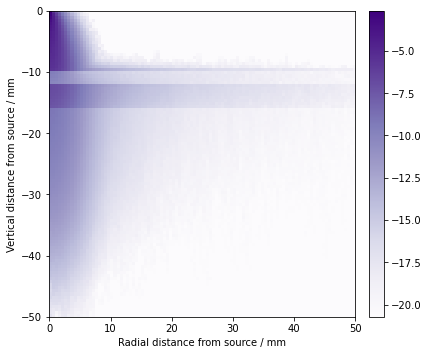

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


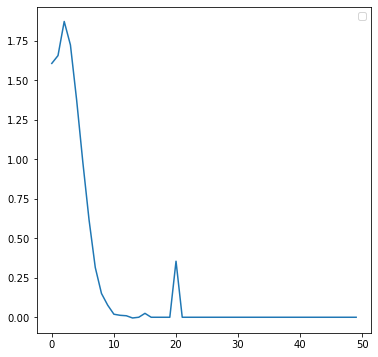

In [42]:
import matplotlib.pyplot as plt

import sys

absorption = np.genfromtxt(sys.path[0] + '/absorption.csv', delimiter=',')
reflectance = np.genfromtxt(sys.path[0] + '/reflectance.csv', delimiter=',')

fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(np.log(absorption.T + 1e-9), cmap='Purples', extent=[0, 50, -50, 0])

ax.set_xlabel('Radial distance from source / mm')
ax.set_ylabel('Vertical distance from source / mm')

fig.colorbar(im, fraction=0.0457, pad=0.04)

plt.show()

fig, ax = plt.subplots(figsize=(6, 6))

x = np.arange(51)

ax.plot(range(len(reflectance)), reflectance / one_layer_approx(x))

ax.legend()

plt.show()